## Cheat sheet
- Accuracy  → Overall kitna sahi
- Precision → Jo bola, sahi bola?
- Recall    → Jo sahi tha, bola?
- F1-score  → Precision + Recall ka balance

## EDA Tips
-  Missing values?
- Numerical vs categorical?
- Target imbalance?
- Outliers?
- Feature–target relation?



In [35]:
!pip install faker pandas

In [36]:
import pandas as pd
import random
from faker import Faker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fake = Faker()

n = 100

categories = ['Electronics', 'Fashion', 'Home', 'Books', 'Sports']
countries = ['USA', 'UK', 'India', 'Canada', 'Australia']
genders = ['Male', 'Female']

data = []

for _ in range(n):
    user_id = fake.unique.random_int(min=1000, max=9999)
    age = random.randint(18, 60)
    gender = random.choice(genders)
    country = random.choice(countries)
    browsed_category = random.choice(categories)
    viewed_time = random.randint(1, 60)
    product_price = random.randint(10, 500)

    purchased_prob = 0.3 + 0.01*viewed_time - 0.001*product_price
    purchased = 1 if random.random() < purchased_prob else 0

    data.append([user_id, age, gender, country, browsed_category, viewed_time, product_price, purchased])

df = pd.DataFrame(data, columns=['UserID', 'Age', 'Gender', 'Country', 'BrowsedCategory',
                                 'ViewedTimeMin', 'ProductPrice', 'Purchased'])
df.to_csv("ecom_recommendation.csv", index=False)

print(df.head())


   UserID  Age  Gender    Country BrowsedCategory  ViewedTimeMin  \
0    7501   26    Male     Canada           Books             27   
1    5495   26  Female        USA           Books             18   
2    1814   28    Male     Canada     Electronics              7   
3    5211   30    Male         UK          Sports             55   
4    7631   38    Male  Australia     Electronics             10   

   ProductPrice  Purchased  
0           260          0  
1           416          0  
2           378          0  
3           377          1  
4            55          1  


In [37]:
df.shape

(100, 8)

In [38]:
df['Country'].value_counts()

Country
India        24
UK           23
Canada       20
USA          18
Australia    15
Name: count, dtype: int64

In [39]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Country', 'BrowsedCategory',
       'ViewedTimeMin', 'ProductPrice', 'Purchased'],
      dtype='object')

In [40]:
df.describe()

,UserID,Age,ViewedTimeMin,ProductPrice,Purchased
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,5560.780000,38.24000,29.260000,259.880000,0.320000
std,2740.385771,13.38484,16.673102,147.278221,0.468826
min,1037.000000,18.00000,1.000000,11.000000,0.000000
25%,3089.500000,26.00000,14.000000,137.000000,0.000000
50%,5187.500000,37.50000,29.500000,264.000000,0.000000
75%,7782.750000,51.00000,44.000000,387.000000,1.000000
max,9986.000000,60.00000,60.000000,498.000000,1.000000


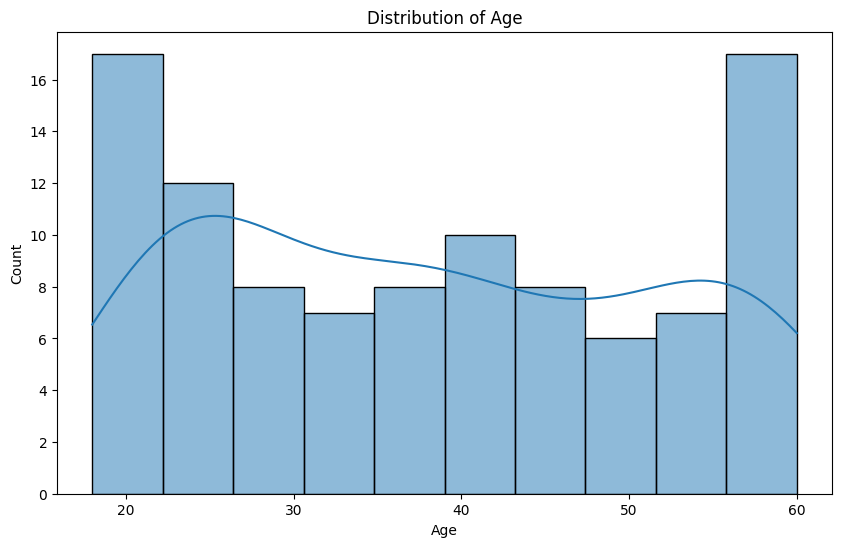

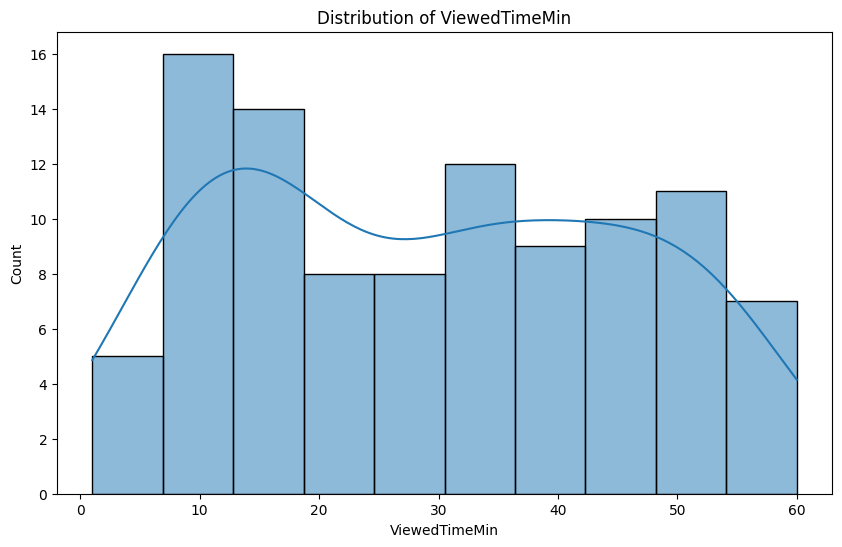

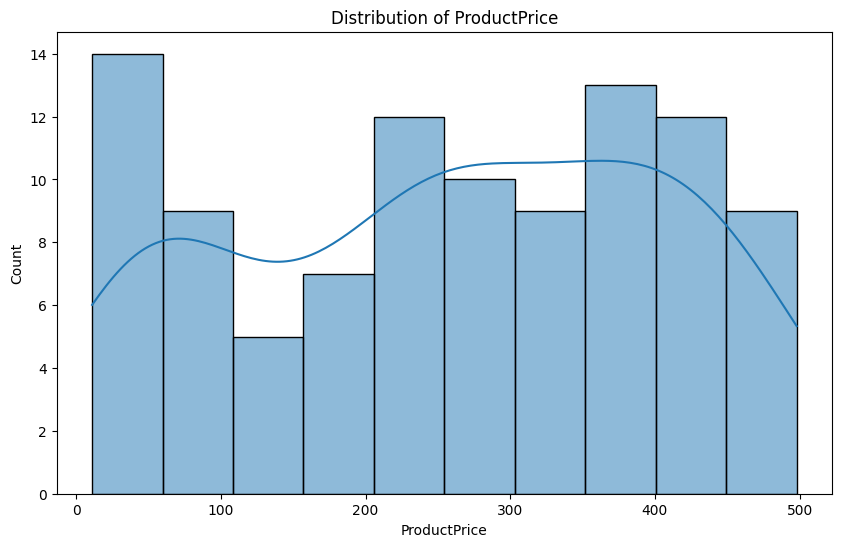

In [41]:
num_cols = df[['Age', 'ViewedTimeMin', 'ProductPrice']]

for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], kde=True,bins=10)
  plt.title(f'Distribution of {col}')
  plt.show()

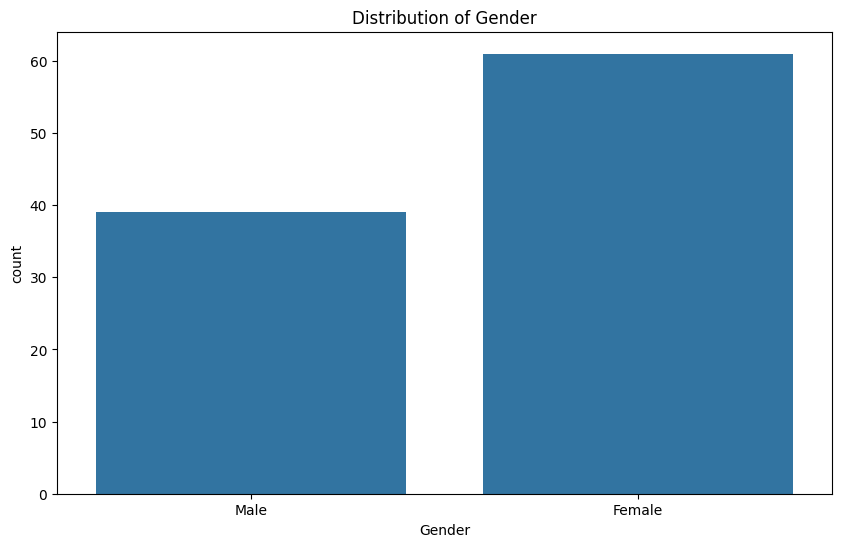

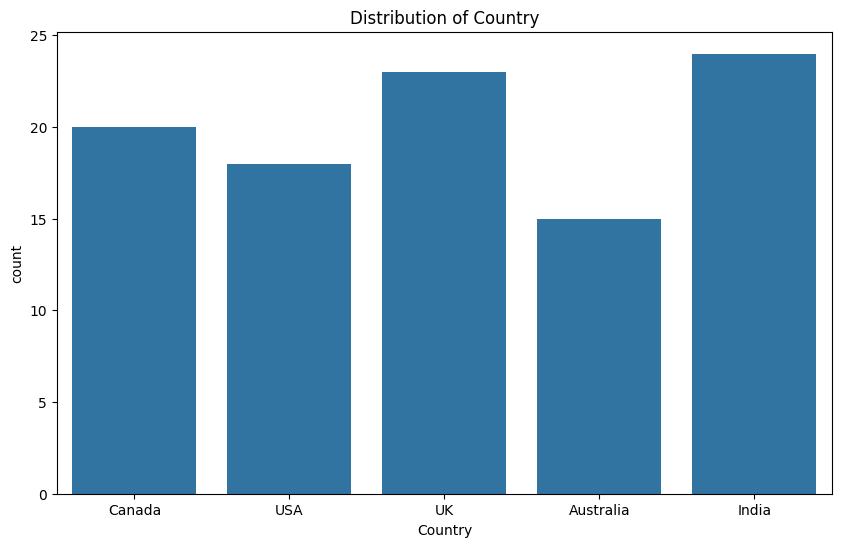

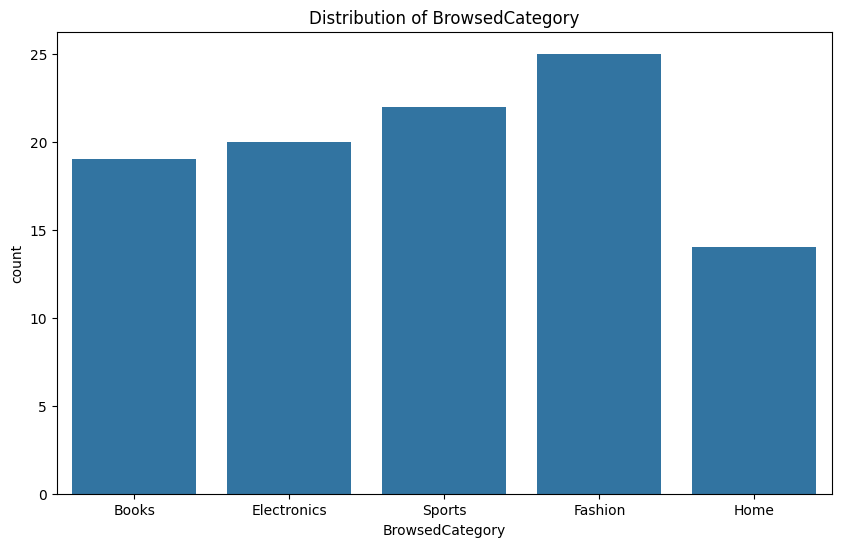

In [42]:
cat_cols = df[['Gender', 'Country', 'BrowsedCategory']]
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.show()

In [43]:
import numpy as np
df['Age_log'] = np.log1p(df['Age'])
df['ViewedTimeMin_log'] = np.log1p(df['ViewedTimeMin'])


In [44]:
df['ProductPrice_sqrt'] = np.sqrt(df['ProductPrice'].max() - df['ProductPrice'])

In [45]:
df['PricePerMinute'] = df['ProductPrice'] / (df['ViewedTimeMin'] + 1)
df['Age_group'] = pd.cut(df['Age'], bins=[18,30,40,50,60],
                         labels=['Young','Adult','Middle','Senior'],
                         include_lowest=True)
df['Price_range'] = pd.cut(df['ProductPrice'],
                           bins=[10,40,70, df['ProductPrice'].max()+1],
                           labels=['Cheap','Medium','Expensive'],
                           include_lowest=True)

df['HighViewedTime'] = (df['ViewedTimeMin'] > df['ViewedTimeMin'].median()).astype(int)


In [46]:
df

,UserID,Age,Gender,Country,BrowsedCategory,ViewedTimeMin,ProductPrice,Purchased,Age_log,ViewedTimeMin_log,ProductPrice_sqrt,PricePerMinute,Age_group,Price_range,HighViewedTime
0,7501,26,Male,Canada,Books,27,260,0,3.295837,3.332205,15.427249,9.285714,Young,Expensive,0
1,5495,26,Female,USA,Books,18,416,0,3.295837,2.944439,9.055385,21.894737,Young,Expensive,0
2,1814,28,Male,Canada,Electronics,7,378,0,3.367296,2.079442,10.954451,47.250000,Young,Expensive,0
3,5211,30,Male,UK,Sports,55,377,1,3.433987,4.025352,11.000000,6.732143,Young,Expensive,1
4,7631,38,Male,Australia,Electronics,10,55,1,3.663562,2.397895,21.047565,5.000000,Adult,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2595,36,Male,USA,Electronics,7,454,0,3.610918,2.079442,6.633250,56.750000,Adult,Expensive,0
96,3349,56,Female,Canada,Books,49,486,0,4.043051,3.912023,3.464102,9.720000,Senior,Expensive,1
97,6167,60,Female,UK,Home,32,287,0,4.110874,3.496508,14.525839,8.696970,Senior,Expensive,1
98,3933,51,Female,Canada,Electronics,45,433,1,3.951244,3.828641,8.062258,9.413043,Senior,Expensive,1


In [47]:
df.isna().sum()


UserID               0
Age                  0
Gender               0
Country              0
BrowsedCategory      0
ViewedTimeMin        0
ProductPrice         0
Purchased            0
Age_log              0
ViewedTimeMin_log    0
ProductPrice_sqrt    0
PricePerMinute       0
Age_group            0
Price_range          0
HighViewedTime       0
dtype: int64

In [48]:
num_cols = df[['Age','ViewedTimeMin','ProductPrice','Age_log','ViewedTimeMin_log','ProductPrice_sqrt']]
cat_cols = df[['Gender','Country','BrowsedCategory','Purchased','Age_group','Price_range','HighViewedTime']]

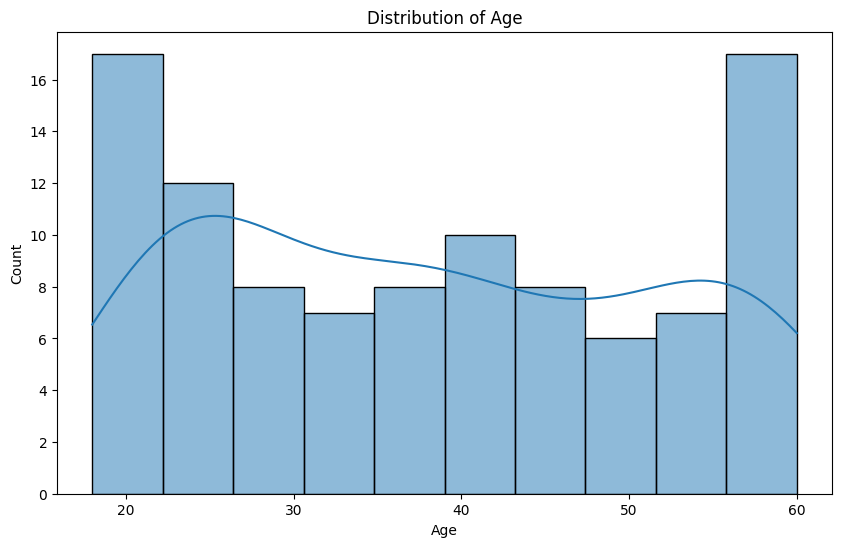

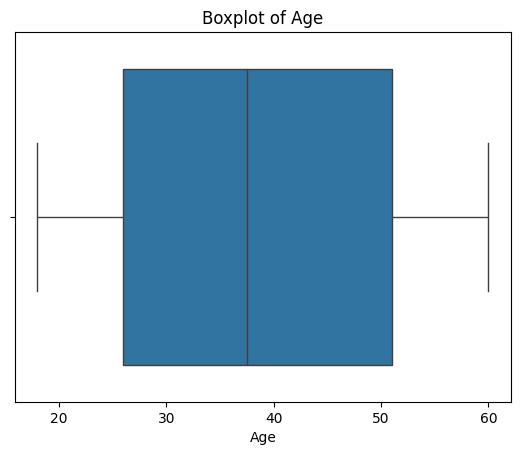

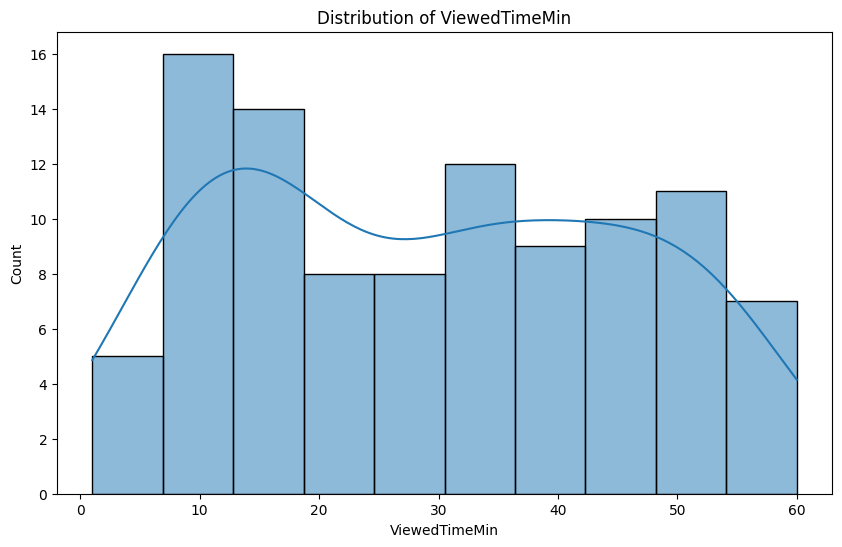

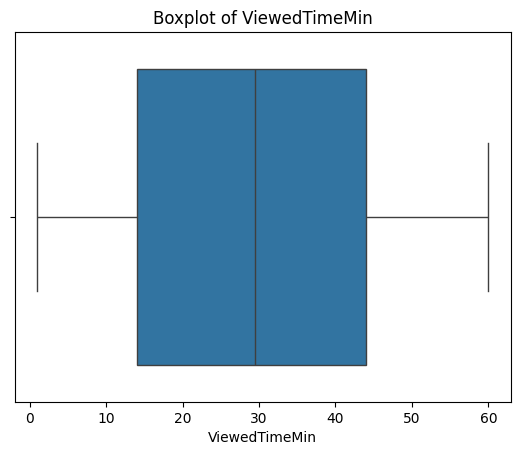

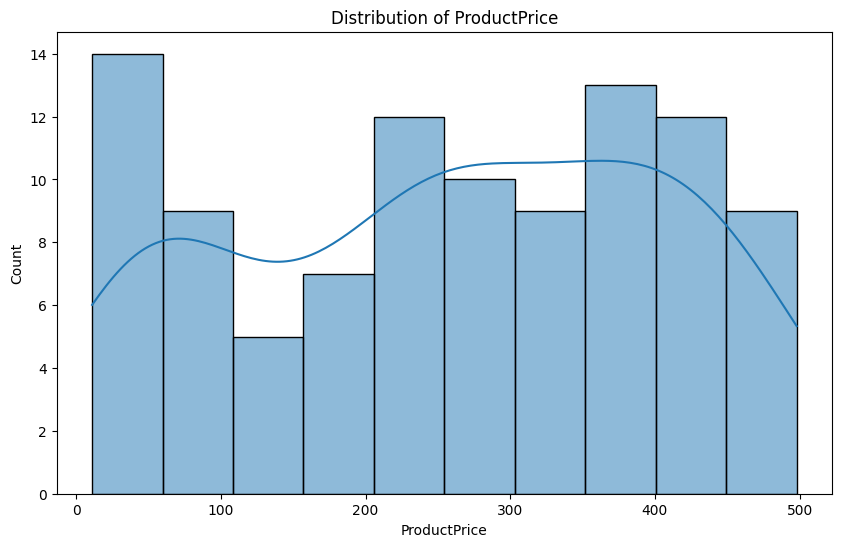

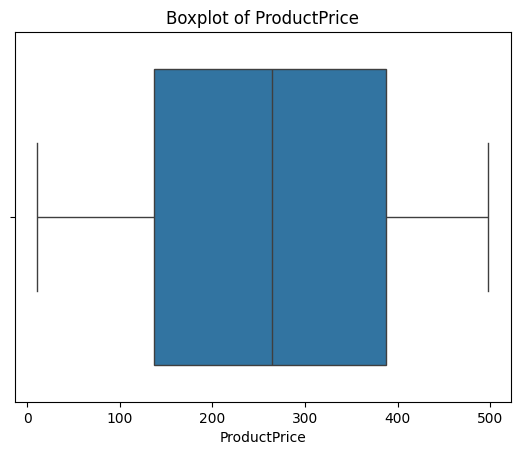

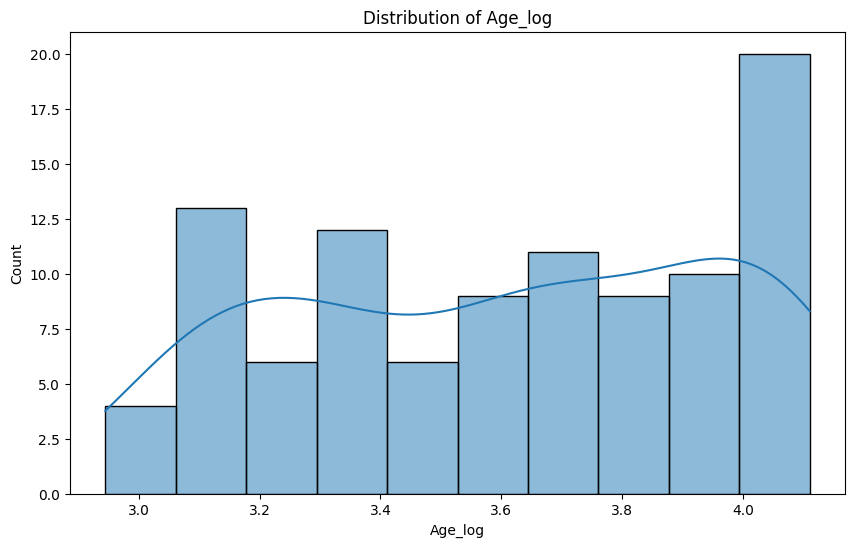

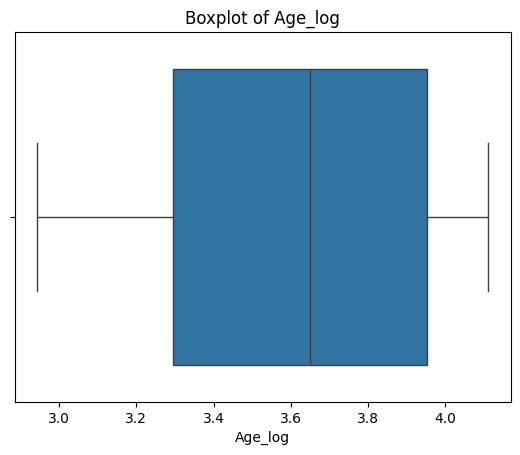

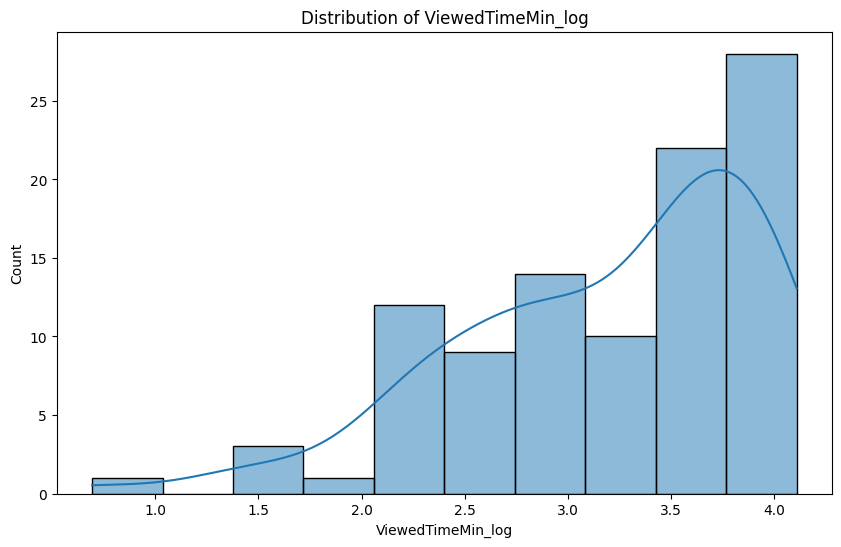

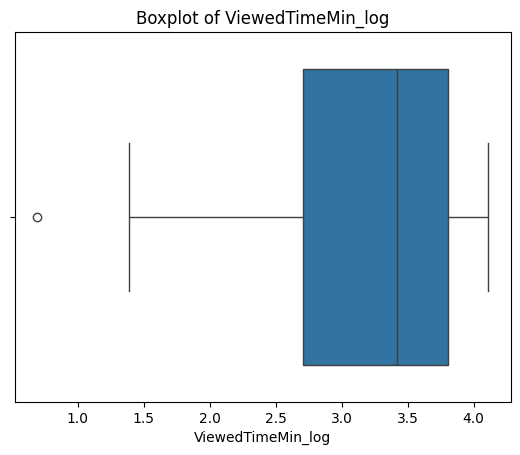

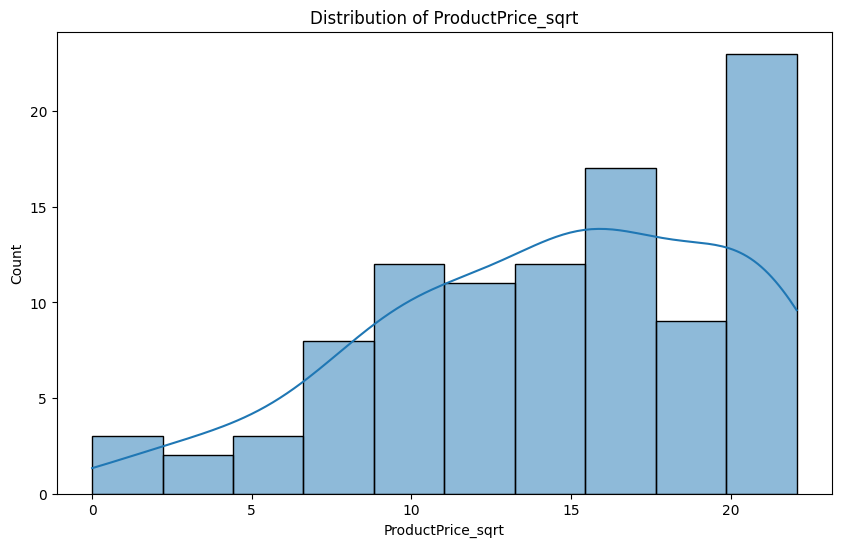

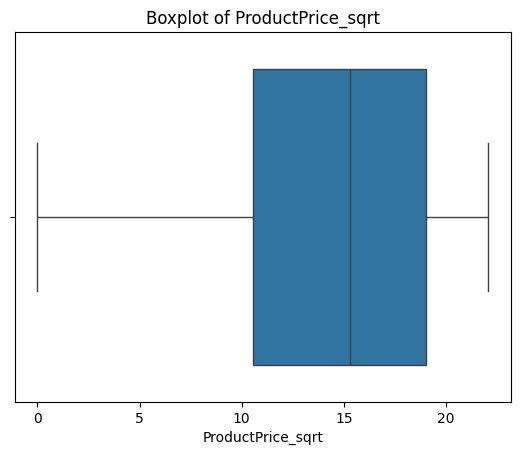

In [49]:
for col in num_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], kde=True,bins=10)
  plt.title(f'Distribution of {col}')
  plt.show()

  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [50]:
# skew less than 0 -->left skew, greater than 0 --->right skew

df['ProductPrice_sqrt'].skew()

np.float64(-0.5155967059207974)

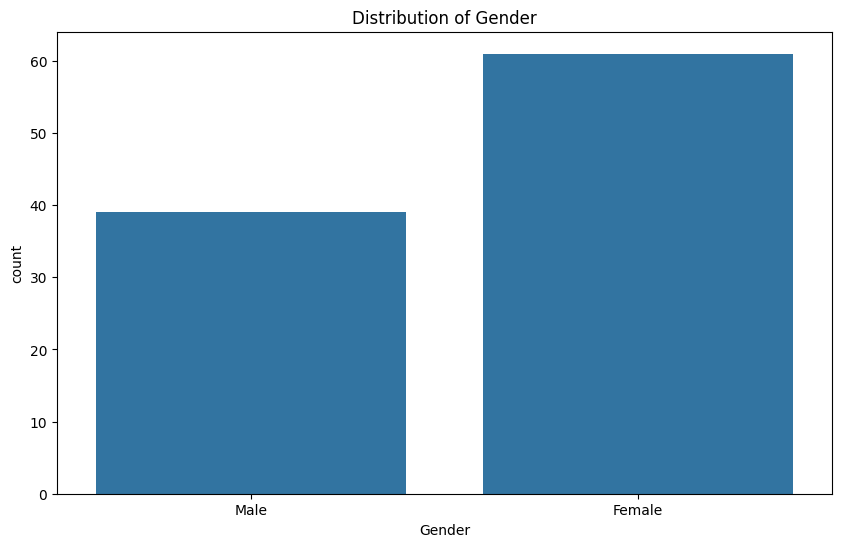

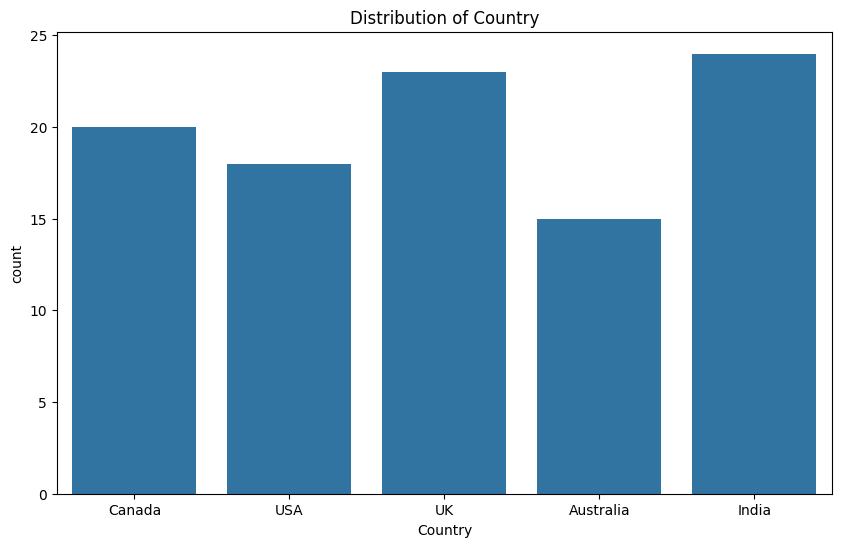

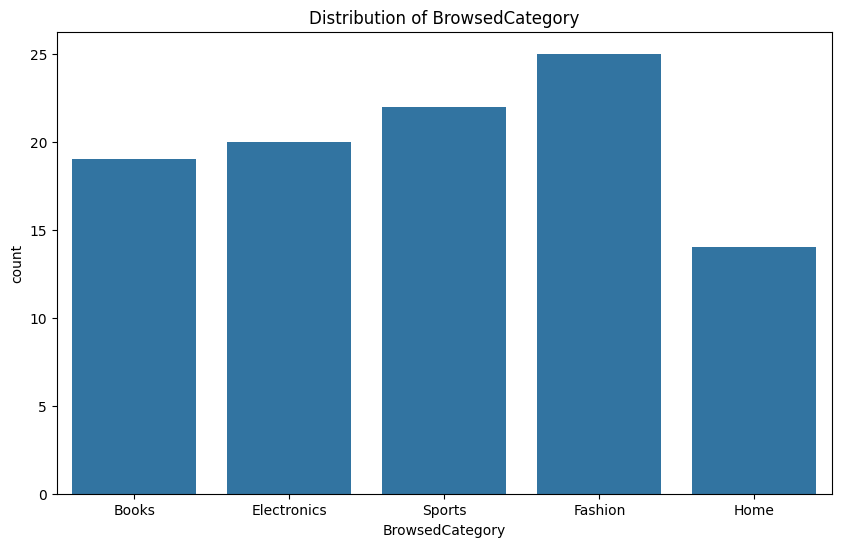

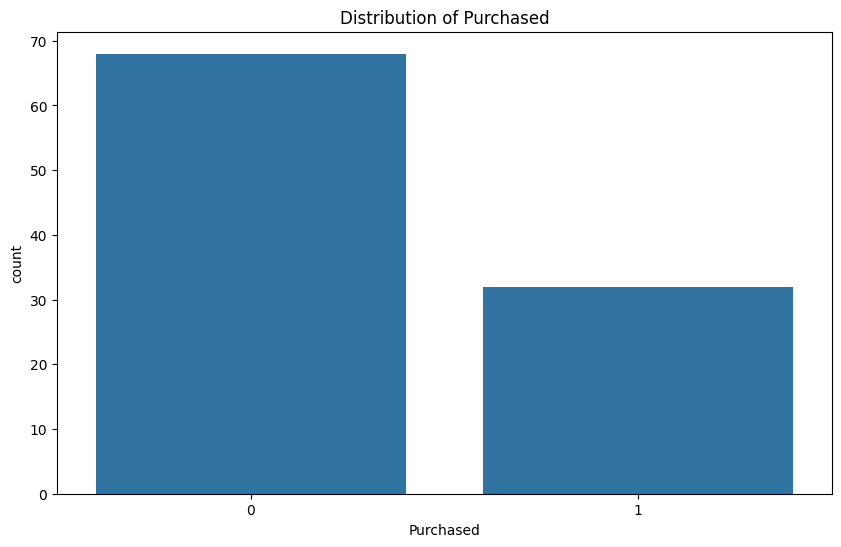

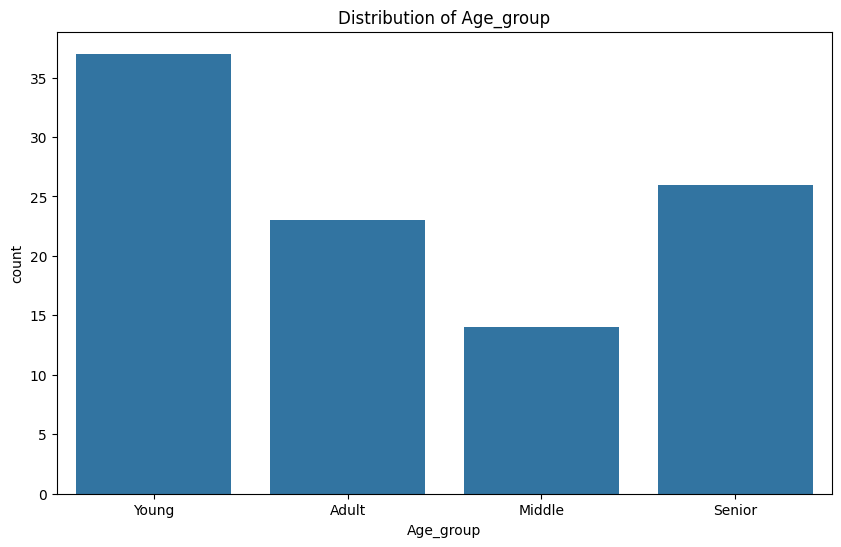

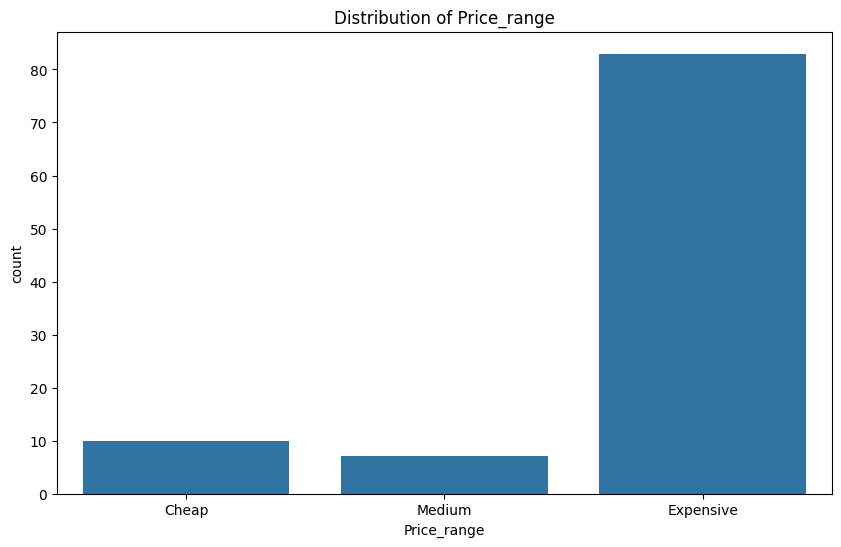

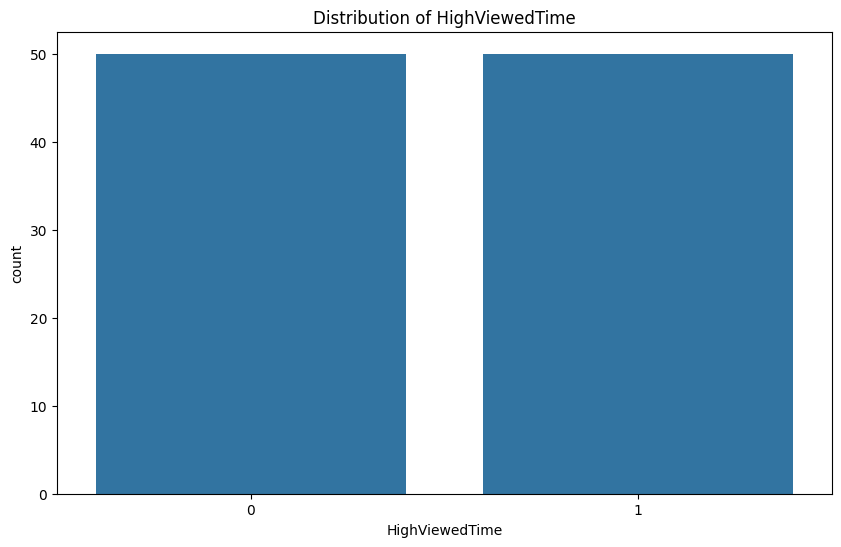

In [51]:
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.show()

In [52]:
cat_cols = ['Gender','Country','BrowsedCategory','Price_range','Age_group','HighViewedTime']

for col in cat_cols:
    df[col] = df[col].astype(str)

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
X_cat = ohe.fit_transform(df[cat_cols])
X_cat_df = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(cat_cols))

In [54]:
num_cols = ['Age','ViewedTimeMin','ProductPrice','Age_log','ViewedTimeMin_log','ProductPrice_sqrt']
X_num_df = df[num_cols].reset_index(drop=True)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num_df)
X_num_df = pd.DataFrame(X_num, columns=X_num_df.columns)

In [56]:

X = pd.concat([X_num_df.reset_index(drop=True), X_cat_df.reset_index(drop=True)], axis=1)
y = df['Purchased']


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1-score: {f1_score(y_test, y_pred)}")

Accuracy: 0.45
precision: 0.0
recall: 0.0
f1-score: 0.0


[[9 3]
 [8 0]]


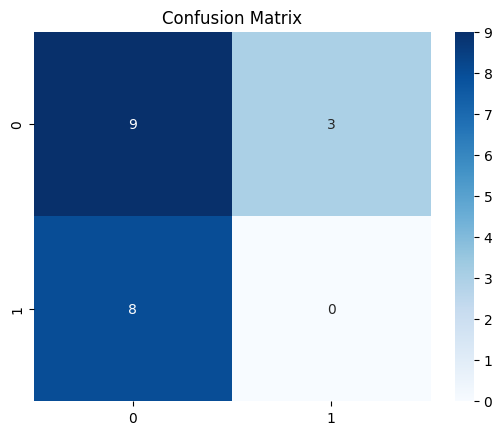

In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5
Precision: 0.3333333333333333
Recall: 0.25
F1 Score: 0.2857142857142857


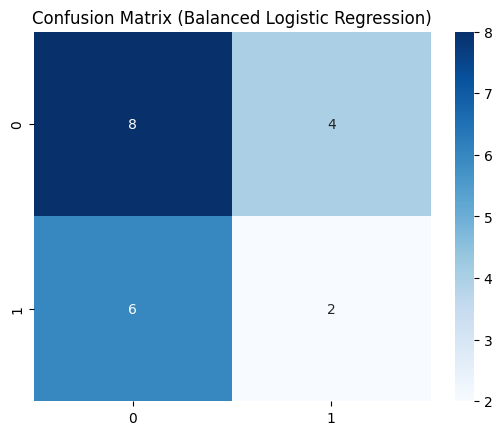

In [60]:
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)


# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1 Score:", f1_score(y_test, y_pred_balanced))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Logistic Regression)')
plt.show()

Accuracy: 0.55
Precision: 0.4
Recall: 0.25
F1 Score: 0.3076923076923077


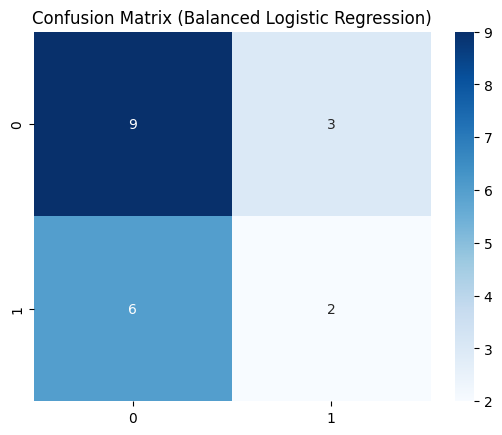

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Logistic Regression)')
plt.show()


Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


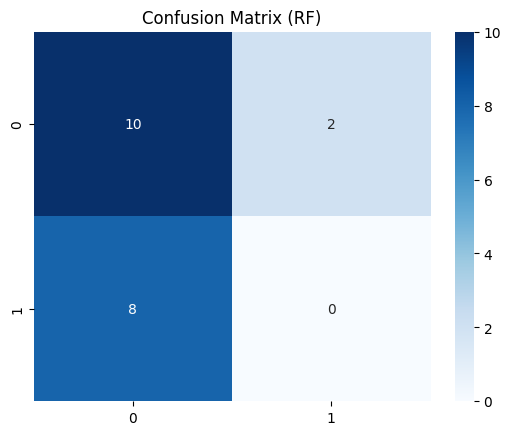

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (RF)')
plt.show()

In [63]:
#LOGISTIC REGRESSION WINS HERE!!

In [64]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                        Feature  Coefficient
1                 ViewedTimeMin     0.889526
15        Price_range_Expensive     0.626677
12      BrowsedCategory_Fashion     0.612871
8                 Country_India     0.559080
5             ProductPrice_sqrt     0.482352
14       BrowsedCategory_Sports     0.469431
4             ViewedTimeMin_log     0.427701
13         BrowsedCategory_Home     0.274832
19              Age_group_Young     0.255570
11  BrowsedCategory_Electronics     0.248924
16           Price_range_Medium     0.173102
20             HighViewedTime_1     0.171999
18             Age_group_Senior     0.158557
3                       Age_log     0.124875
7                Country_Canada     0.000669
6                   Gender_Male    -0.008058
2                  ProductPrice    -0.107465
9                    Country_UK    -0.172744
0                           Age    -0.330899
10                  Country_USA    -0.455611
17             Age_group_Middle    -1.080320


In [65]:
import joblib
joblib.dump(model_balanced, 'model.pkl')
joblib.dump(ohe,'ohe.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']